Модель двигателя: $\ddot{\theta} + \frac{1}{T} \dot{\theta} = \frac{k}{T} U$

$$
    s^2 \Theta(s) + s \frac{1}{T} \Theta(s) = \frac{k}{T} U(s)
$$

$$
    \Theta(s) = \frac{k (k_p E)}{s (Ts + 1)}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import sympy

DATA_PATH = "../data/task2_1"
FILES = os.listdir(DATA_PATH)

PLOT_PATH = "figs"
if os.path.exists(PLOT_PATH):
    shutil.rmtree(PLOT_PATH)
os.makedirs(PLOT_PATH)

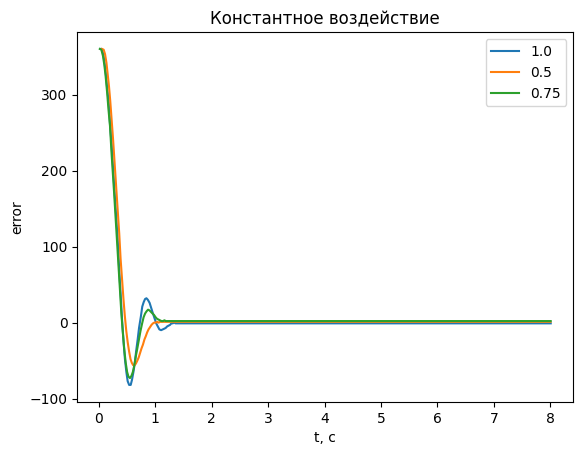

In [2]:
for file in FILES:
    if 'linear' in file:
        continue
    data =  np.loadtxt(f"{DATA_PATH}/{file}", dtype=float)
    time = data[:, 0]
    kp = data[0, 1]
    error = data[:, 2] 
    plt.plot(time, error, label=f'{kp}')
    
plt.title('Константное воздействие')
plt.xlabel('t, c')
plt.ylabel('error')
plt.legend()

In [7]:
s, T, k, k_p = sympy.symbols('s T k k_p')
k_mean, T_mean = (137.92600995757763, 0.041696421173612414)

def get_limit(K_p):
    G = 360 / s ** 2 + 360 / s
    W_sympy = k_p * k / (s * (T * s + 1))
    W_closed = 1 / (1 + W_sympy)
    limit = (W_closed * G * s).subs({T: T_mean, k: k_mean, k_p: K_p})
    return float(sympy.N(sympy.limit(limit, s, 0)))

5.22019016008259
Отличие от рассчетного для k_p = 0.5: 56.588954813672295
2.6100950800412877
Отличие от рассчетного для k_p = 1.0: 27.92408842215598
3.4801267733884003
Отличие от рассчетного для k_p = 0.75: 37.494274700610625


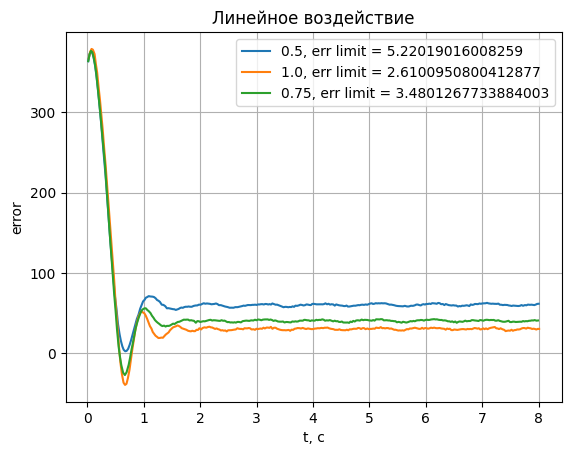

In [8]:
for file in FILES:
    if not 'linear' in file:
        continue
    data =  np.loadtxt(f"{DATA_PATH}/{file}", dtype=float)
    time = data[:, 0]
    kp = data[0, 1]
    
    error = data[:, 2]
    error_limit = get_limit(kp)
    print(error_limit)
    print(f'Отличие от рассчетного для k_p = {kp}: {abs(error_limit - error[-1])}')
    
    plt.plot(time, error, label=f'{kp}, err limit = {error_limit}')
    
plt.title('Линейное воздействие')
plt.xlabel('t, c')
plt.ylabel('error')
plt.legend()
plt.grid()

Отличие от рассчетного для k_p = 0.5: 237.28571945469912
Отличие от рассчетного для k_p = 1.0: 119.01324871202931
Отличие от рассчетного для k_p = 0.75: 158.42217481163738


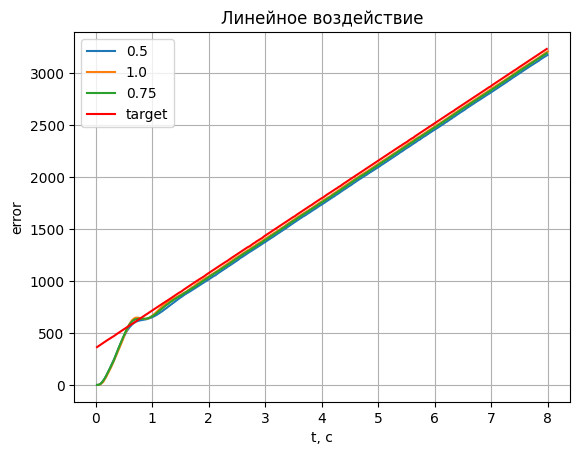

In [5]:
for file in FILES:
    if not 'linear' in file:
        continue
    data =  np.loadtxt(f"{DATA_PATH}/{file}", dtype=float)
    time = data[:, 0]
    kp = data[0, 1]
    
    error = data[:, 2]
    pos = data[:, 3]
    target = data[:, 4]
    # print(get_limit(kp))
    error_limit = get_limit(kp)
    print(f'Отличие от рассчетного для k_p = {kp}: {abs(error_limit - error[-1])}')
    plt.plot(time, pos, label = f'{kp}')
    
plt.plot(time, target,'r', label=f'target')
plt.title('Линейное воздействие')
plt.xlabel('t, c')
plt.ylabel('error')
plt.legend()
plt.grid()